In [1]:
# Must be installed the first time you run this code
!pip install hdbscan
!pip install kneed
%pip install seaborn
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.


In [2]:
# ...existing code...
# upgrade installer tools and preinstall binary NumPy/SciPy
%pip install --upgrade pip setuptools wheel
%pip install numpy scipy
%pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
# ...existing code...

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:


# ...existing code...
# upgrade installer and install prebuilt numpy/scipy, then latest yellowbrick
%pip install --upgrade pip setuptools wheel
%pip install --upgrade numpy scipy
%pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
# ...existing code...

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Install and import plotly
%pip install plotly
import plotly
import plotly.express as px
import plotly.io as pio
# Use 'colab' on Colab, 'notebook' on local Jupyter, or 'browser' to open in a browser
pio.renderers.default = "colab"
print("plotly version:", plotly.__version__)
import seaborn as sns
import plotly.express as px
!pip install scikit-learn

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import pairwise_distances
# Install Yellowbrick (pin to 1.2.4 if you want)
%pip install yellowbrick==1.2.4

# then import
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from kneed import KneeLocator
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage
import hdbscan

Note: you may need to restart the kernel to use updated packages.
plotly version: 6.5.2
ERROR: Could not find a version that satisfies the requirement yellowbrick==1.2.4 (from versions: 0.1, 0.3a1, 0.3.1, 0.3.2, 0.3.3, 0.4, 0.4.1, 0.4.2, 0.5, 0.6, 0.7, 0.8, 0.9, 0.9.1, 1.0, 1.0.post1, 1.0.1, 1.1, 1.2, 1.2.1, 1.3, 1.3.post1, 1.4, 1.5)
ERROR: No matching distribution found for yellowbrick==1.2.4
Note: you may need to restart the kernel to use updated packages.


In [5]:
# Load an CSV file
file_path = 'https://www.dropbox.com/scl/fi/1jml6i3whezn5dzarkb6a/credit_card_customers.csv?rlkey=o5yjpunceaa9vo51yyudn0qw8&st=6tcl8ivy&dl=1'
data = pd.read_csv(file_path)

data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## Data Exploration

In [6]:
# Numeric vs categorical
num_cols = data.select_dtypes(include=np.number).columns.tolist()
cat_cols = [c for c in data.columns if c not in num_cols]

print("Numeric columns:", len(num_cols))
print(num_cols)
print("\nCategorical columns:", len(cat_cols))
print(cat_cols)


Numeric columns: 15
['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

Categorical columns: 6
['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


In [7]:
ID_COL = "CLIENTNUM"
LABEL_COL = "Attrition_Flag"

df_eda = data.drop(columns=[ID_COL], errors="ignore")

In [8]:
df_eda.isna().sum().sort_values(ascending=False).head(20)


Attrition_Flag              0
Customer_Age                0
Total_Ct_Chng_Q4_Q1         0
Total_Trans_Ct              0
Total_Trans_Amt             0
Total_Amt_Chng_Q4_Q1        0
Avg_Open_To_Buy             0
Total_Revolving_Bal         0
Credit_Limit                0
Contacts_Count_12_mon       0
Months_Inactive_12_mon      0
Total_Relationship_Count    0
Months_on_book              0
Card_Category               0
Income_Category             0
Marital_Status              0
Education_Level             0
Dependent_count             0
Gender                      0
Avg_Utilization_Ratio       0
dtype: int64

In [9]:
df_eda = data.drop(columns=["CLIENTNUM"], errors="ignore")

num_cols = df_eda.select_dtypes(include=np.number).columns.tolist()

df_eda[num_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397


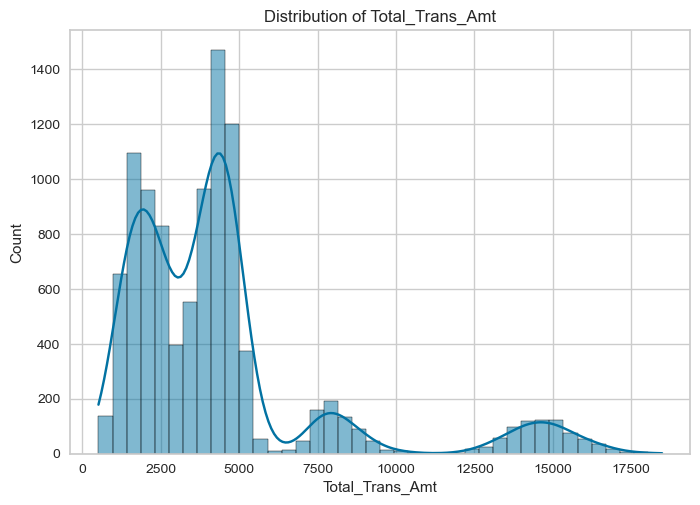

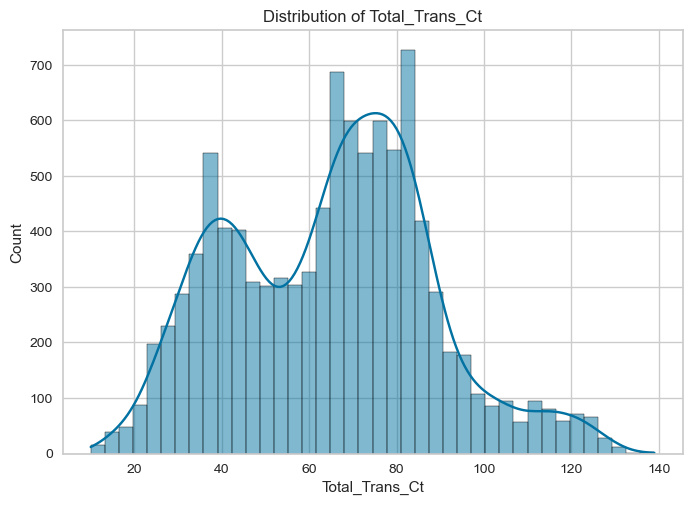

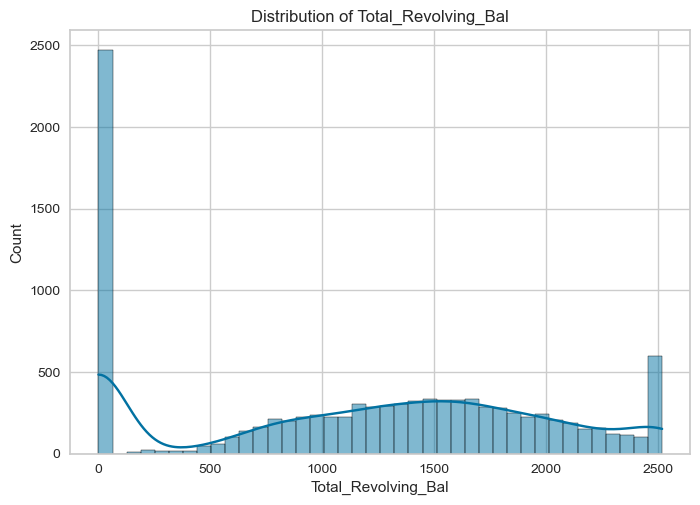

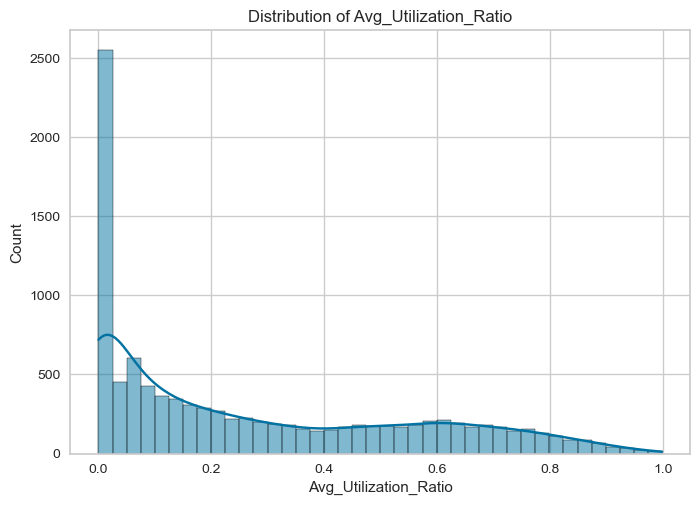

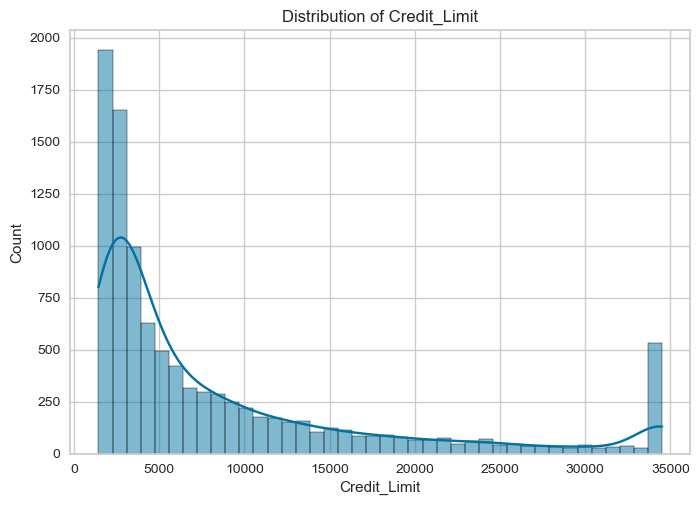

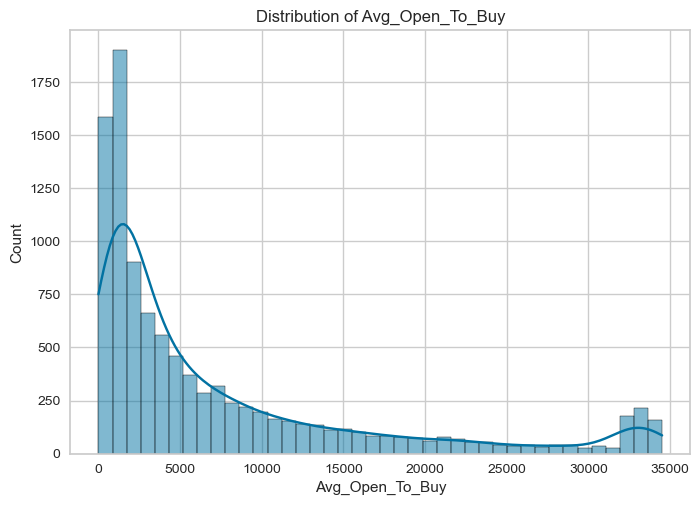

In [10]:
key_numeric = [
    "Total_Trans_Amt",
    "Total_Trans_Ct",
    "Total_Revolving_Bal",
    "Avg_Utilization_Ratio",
    "Credit_Limit",
    "Avg_Open_To_Buy",
]

key_numeric = [c for c in key_numeric if c in data.columns]

for col in key_numeric:
    plt.figure()
    sns.histplot(data[col], bins=40, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


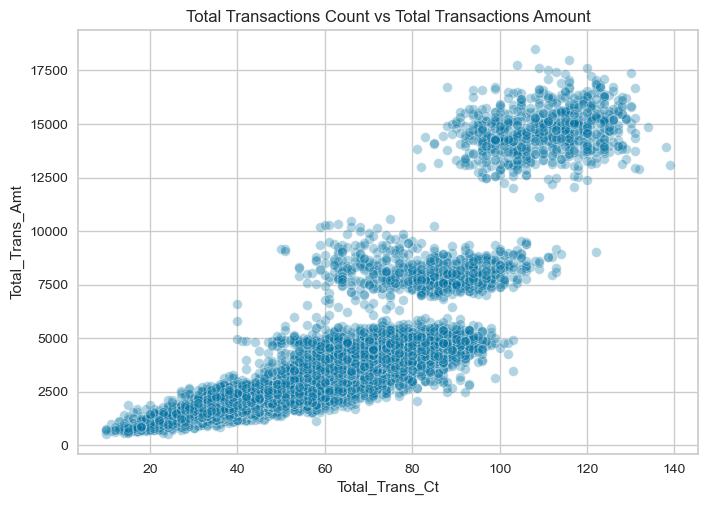

In [11]:
plt.figure()
sns.scatterplot(x=df_eda["Total_Trans_Ct"], y=df_eda["Total_Trans_Amt"], alpha=0.3)
plt.title("Total Transactions Count vs Total Transactions Amount")
plt.xlabel("Total_Trans_Ct")
plt.ylabel("Total_Trans_Amt")
plt.show()


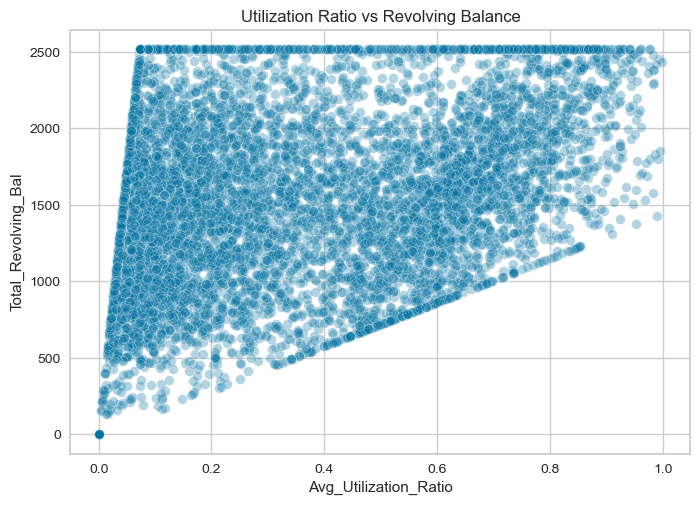

In [12]:
plt.figure()
sns.scatterplot(x=df_eda["Avg_Utilization_Ratio"], y=df_eda["Total_Revolving_Bal"], alpha=0.3)
plt.title("Utilization Ratio vs Revolving Balance")
plt.xlabel("Avg_Utilization_Ratio")
plt.ylabel("Total_Revolving_Bal")
plt.show()


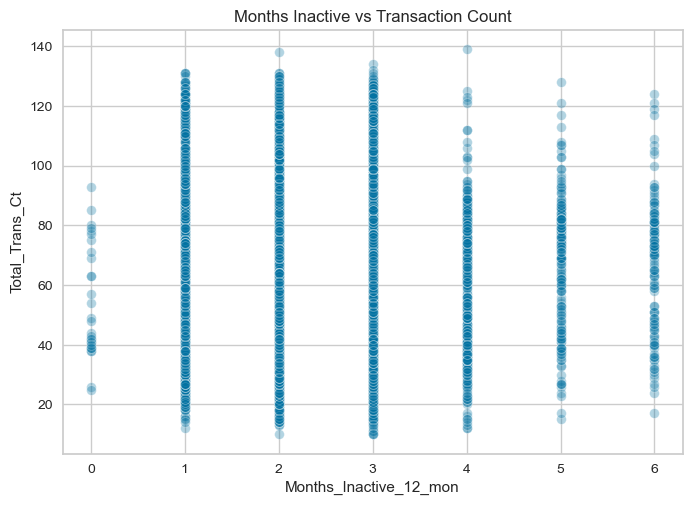

In [13]:
if "Months_Inactive_12_mon" in df_eda.columns:
    plt.figure()
    sns.scatterplot(x=df_eda["Months_Inactive_12_mon"], y=df_eda["Total_Trans_Ct"], alpha=0.3)
    plt.title("Months Inactive vs Transaction Count")
    plt.xlabel("Months_Inactive_12_mon")
    plt.ylabel("Total_Trans_Ct")
    plt.show()


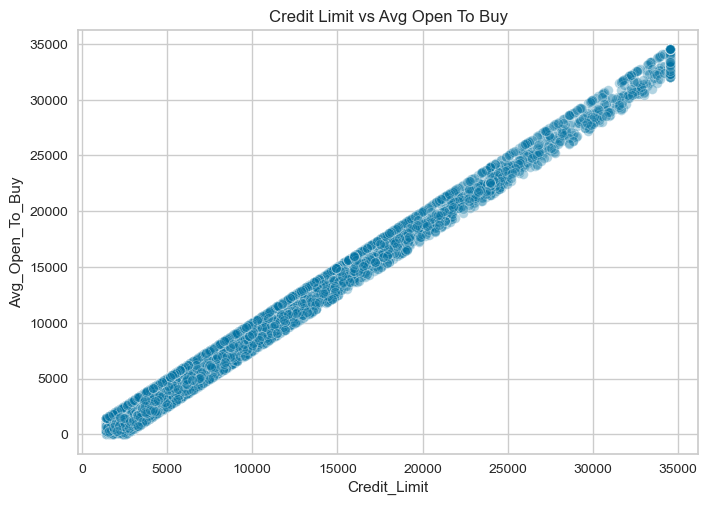

In [14]:
if "Credit_Limit" in df_eda.columns and "Avg_Open_To_Buy" in df_eda.columns:
    plt.figure()
    sns.scatterplot(x=df_eda["Credit_Limit"], y=df_eda["Avg_Open_To_Buy"], alpha=0.3)
    plt.title("Credit Limit vs Avg Open To Buy")
    plt.xlabel("Credit_Limit")
    plt.ylabel("Avg_Open_To_Buy")
    plt.show()


## Data Preprocesssing

In [15]:
ID_COL = "CLIENTNUM"
LABEL_COL = "Attrition_Flag"

df_eda = data.drop(columns=[ID_COL], errors="ignore")

## K-Means Clustering

In [16]:
cluster_vars_v1 = [
    "Total_Trans_Ct",
    "Total_Trans_Amt",
    "Total_Revolving_Bal",
    "Avg_Utilization_Ratio",
    "Months_Inactive_12_mon"
]
from sklearn.preprocessing import StandardScaler

X = data[cluster_vars_v1].copy()

# Handle missing/infinite values
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.median(numeric_only=True))

scaler = StandardScaler()
Xs = scaler.fit_transform(X)


## Hierarchical Clustering

## DBSCAN

In [17]:
data.to_csv('clustered_data.csv', index=False)
files.download('clustered_data.csv')

NameError: name 'files' is not defined